# Pulse oximeter data experiments
## Initialization

In [40]:
%matplotlib inline

In [41]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=7):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_lowpass(cut, fs, order=7):
    nyq = 0.5 * fs
    cut = cut / nyq
    b, a = butter(order, [cut], btype='low')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_lowpass_filter(data, cut, fs, order=5):
    b, a = butter_lowpass(cut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def load_dataset(filename):
    return pandas.read_csv(
        filename,
        header=None,
        names=['ts', 'raw', 'dc_filter', 'md_filter']
    )

## Finger on detector, covered, no LED

In [42]:
data_covered_no_led = load_dataset('data-finger-covered-no-led.txt')

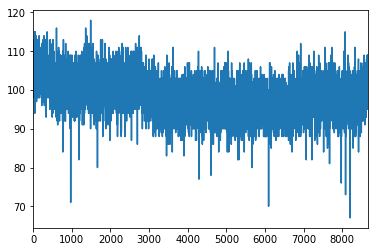

In [43]:
# Show raw data.
data_covered_no_led['raw'].plot()

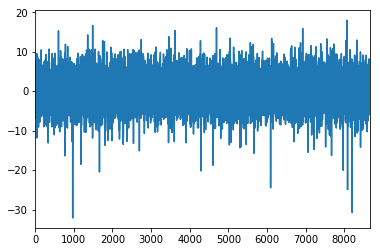

In [44]:
# Show DC-filtered data.
(data_covered_no_led['dc_filter'] / 100).plot()

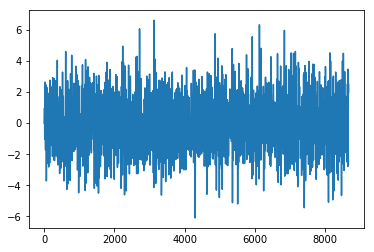

In [47]:
# Determine sampling rate.
fs = int((1.0 / data_covered_no_led['ts'].diff().mean()) * 1000)
# Butterworth low-pass filter (pass below 45Hz).
filtered_lpf_45 = butter_lowpass_filter(data_covered_no_led['dc_filter'] / 100, 45, fs, order=7)
plt.plot(filtered_lpf_45)